# Analysing and Plotting the output of our C++ KF

Doing so in C++ would be hard and annoying

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.patches import Ellipse, Circle

In [50]:
data = np.genfromtxt("./recorded_sensor_data/field_data_2/auto/kf_out.csv", delimiter=",", dtype=np.float64)

x = data[:,0]
y = data[:,1]
yaw = data[:,2]
dx = data[:,3]
dy = data[:,4]
dyaw = data[:,5]
ddx = data[:,6]
ddy = data[:,7]
ddyaw = data[:,8]

cov_x = data[:,9]
cov_y = data[:,19]
cov_yaw = data[:,29]
cov_dx = data[:,39]
cov_dy = data[:,49]
cov_dyaw = data[:,59]
cov_ddx = data[:,69]
cov_ddy = data[:,79]
cov_ddyaw = data[:,89]

In [53]:
print(data.shape)
print(x)
print(y)

(4130, 90)
[ 0.00000e+00 -7.81250e-07 -2.06045e-06 ... -8.40444e+01 -8.46539e+01
 -8.57631e+01]
[ 0.00000e+00  0.00000e+00 -7.28075e-07 ... -1.18326e+02 -1.18821e+02
 -1.19226e+02]


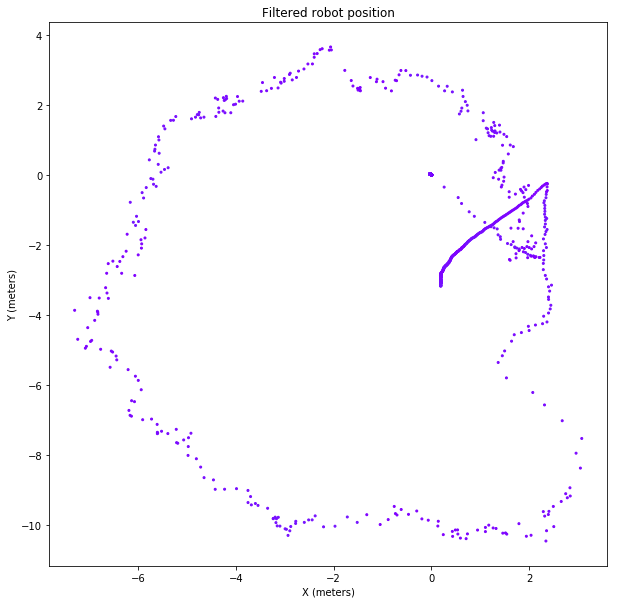

In [54]:
plt.figure(figsize=(10,10))
colors = cm.rainbow(np.linspace(0, 1, data.shape[0]))
plt.scatter(x[:1000],y[:1000], s=4, color=colors[:100])
plt.ylabel("Y (meters)")
plt.xlabel("X (meters)")
plt.title("Filtered robot position")
plt.show()

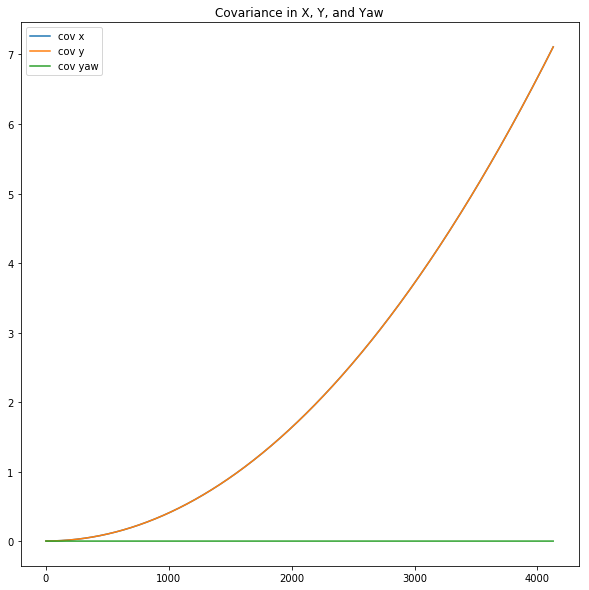

In [62]:
plt.figure(figsize=(10,10))
plt.plot(cov_x, label='cov x')
plt.plot(cov_y, label='cov y')
plt.plot(cov_yaw, label='cov yaw')
plt.title("Covariance in X, Y, and Yaw")
plt.legend()
plt.show()